# I. Hybrid Images

### Part I: Hybrid Images

In [2]:
! pip install opencv-python

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 55.7 MB 77.0 MB/s eta 0:00:01   |███▉                            | 6.7 MB 769 kB/s eta 0:01:04


#### 1.Original and filtered input images

In [6]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal
datadir = "/Users/marchon/Downloads/hybrid/" 
utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [7]:
%matplotlib notebook  
import matplotlib.pyplot as plt

In [103]:
im1_file = datadir + 'da_vinci.jpg'
im2_file = datadir + 'mona_lisa.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

In [105]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>

In [106]:
pts_im2 = utils.prompt_eye_selection(im2)

<IPython.core.display.Javascript object>

In [107]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [108]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


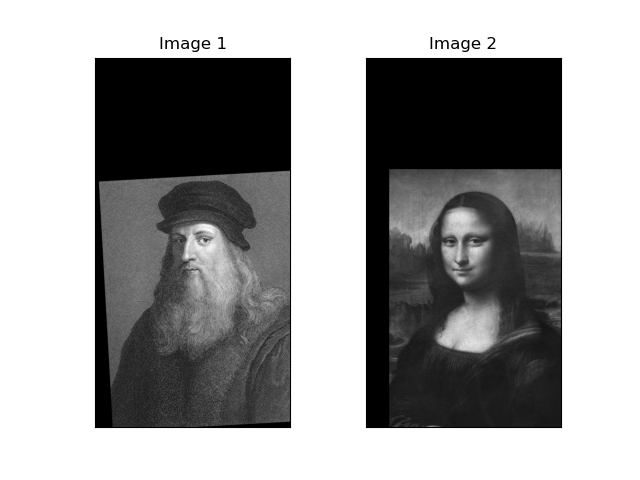

In [109]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [19]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  
    # Process each channel independently if images are RGB (height x width x 3)
    if len(im1.shape) == 3 and len(im2.shape) == 3:
        low_pass_im = np.zeros_like(im1)
        high_pass_im = np.zeros_like(im2)
        for c in range(3):
            low_pass_im[:,:,c] = gaussian_filter(im1[:,:,c], sigma_low)
            high_pass_im[:,:,c] = im2[:,:,c] - gaussian_filter(im2[:,:,c], sigma_high)
            
    # if images are grayscale (height x width)
    else:
        low_pass_im = gaussian_filter(im1, sigma_low)
        high_pass_im = im2 - gaussian_filter(im2, sigma_high)

    hybrid_im = low_pass_im + high_pass_im
    hybrid_im = np.clip(hybrid_im, 0, 255)  # Ensure values are within [0, 255] if images are of type uint8
    
    return low_pass_im, high_pass_im, hybrid_im

#low-pass filter: a standard 2D Gaussian filter
def gaussian_filter(im, sigma):
    """
    Apply a Gaussian filter to an image.

    Inputs:
        im: 2D numpy array, the input image.
        sigma: float, the standard deviation of the Gaussian kernel.

    Output:
        retrun a 2D numpy array, the filtered image.
    """
    #create a 2D Gaussian kernel
    kernel_size = int(np.ceil(sigma)*6+1) #ensure kernel size is odd
    fil_1D = cv2.getGaussianKernel(kernel_size, sigma) # 1D kernel
    fil_2D = fil_1D * fil_1D.T # 2D kernel by outer product
    
    #apply the kernel to the image
    im_fil = cv2.filter2D(im, -1, fil_2D) #the depth of the output image is the same as the source
    
    return im_fil

#### 2. Hybrid image result

<IPython.core.display.Javascript object>


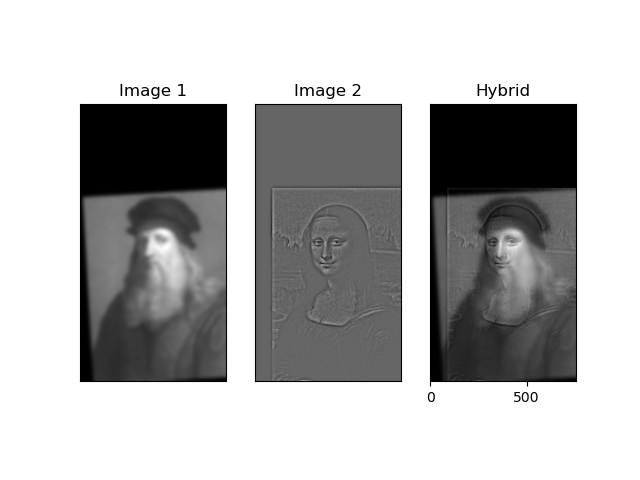

(Text(0.5, 1.0, 'Hybrid'), [], [])

In [131]:
sigma_low = 10 # choose parameters that work for your images
sigma_high = 8

low_pass_im, high_pass_im, hybrid_im = hybridImage(im1, im2, sigma_low, sigma_high)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(low_pass_im,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(high_pass_im,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(hybrid_im,cmap='gray')
axes[2].set_title('Hybrid'), axes[1].set_xticks([]), axes[2].set_yticks([])

<IPython.core.display.Javascript object>


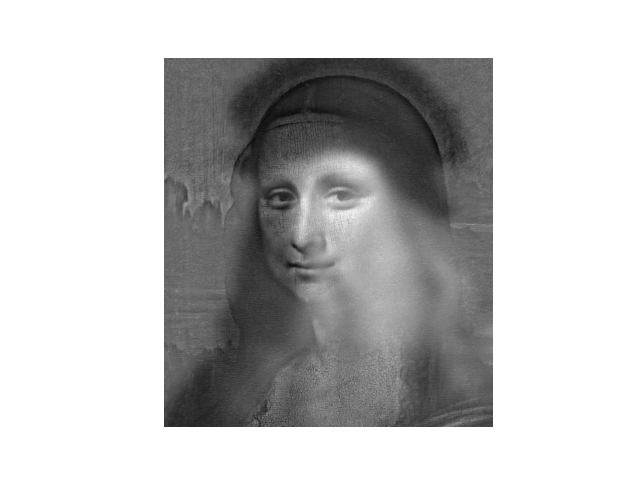

In [132]:
cropped_object = utils.interactive_crop(hybrid_im)

#### 3. FFT Images

In [ ]:
def fft_display(im):
    return np.log(np.abs(np.fft.fftshift(np.fft.fft2(im))))

In [182]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax in axes:
    ax.tick_params(axis='x', labelsize='5') 
    ax.tick_params(axis='y', labelsize='5')
    
im1_display = axes[0].imshow(fft_display(im1))
axes[0].set_title('Image 1', fontsize=10)
axes[0].set_xticks([])
axes[0].set_yticks([])
cbar1 = fig.colorbar(im1_display, ax=axes[0])
cbar1.ax.tick_params(labelsize=6)

low_pass_im_display = axes[1].imshow(fft_display(low_pass_im))
axes[1].set_title('Filtered Image 1', fontsize=10)
axes[1].set_xticks([])
axes[1].set_yticks([])
cbar2 = fig.colorbar(low_pass_im_display, ax=axes[1])
cbar2.ax.tick_params(labelsize=6)

im2_display = axes[2].imshow(fft_display(im2))
axes[2].set_title('Image 2', fontsize=10)
axes[2].set_xticks([])
axes[2].set_yticks([])
cbar3 = fig.colorbar(low_pass_im_display, ax=axes[2])
cbar3.ax.tick_params(labelsize=6)

high_pass_im_display = axes[3].imshow(fft_display(high_pass_im))
axes[3].set_title('Filtered Image 2', fontsize=10)
axes[3].set_xticks([])
axes[3].set_yticks([])
cbar4 = fig.colorbar(low_pass_im_display, ax=axes[3])
cbar4.ax.tick_params(labelsize=6)

hybrid_im_display = axes[4].imshow(fft_display(hybrid_im))
axes[4].set_title('Hybrid Image', fontsize=10)
axes[4].set_xticks([])
axes[4].set_yticks([])
cbar5 = fig.colorbar(low_pass_im_display, ax=axes[4])
cbar5.ax.tick_params(labelsize=6)

plt.show()

<IPython.core.display.Javascript object>

#### 4. additional test results

In [230]:
im1_file = datadir + 'messi.jpg'
im2_file = datadir + 'cr7.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


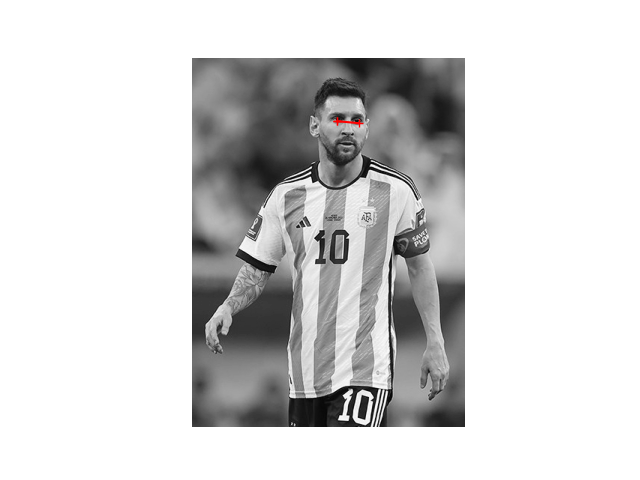

In [231]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


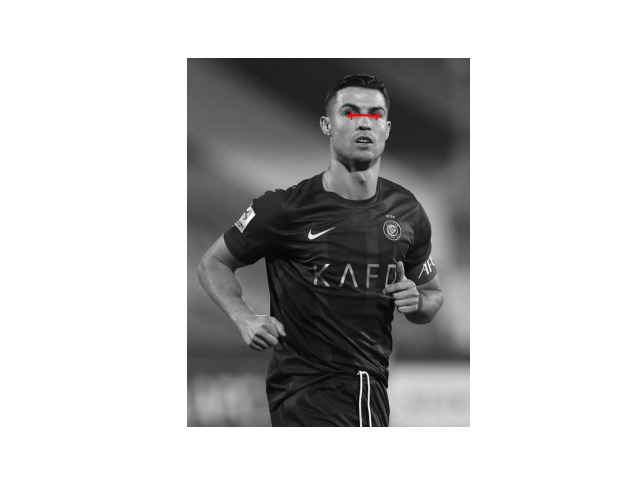

In [232]:
pts_im2 = utils.prompt_eye_selection(im2)

<IPython.core.display.Javascript object>


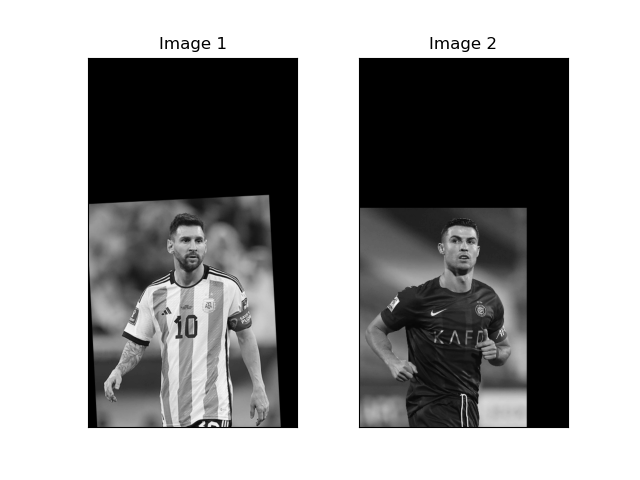

In [233]:
#alignment
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

#greyscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

#sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

<IPython.core.display.Javascript object>


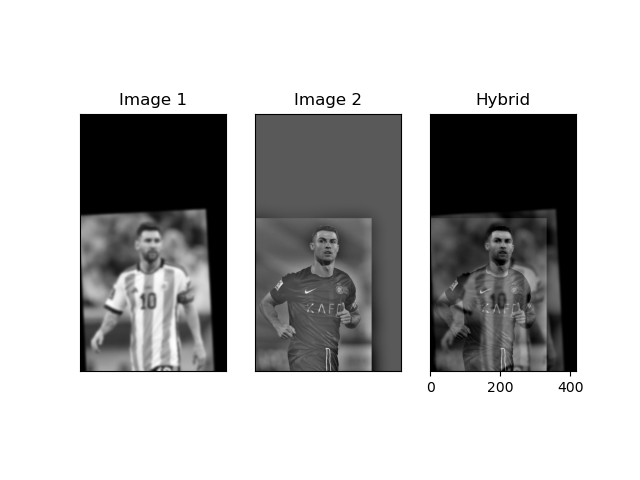

(Text(0.5, 1.0, 'Hybrid'), [], [])

In [264]:
#show results
sigma_low = 3
sigma_high = 25

low_pass_im, high_pass_im, hybrid_im = hybridImage(im1, im2, sigma_low, sigma_high)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(low_pass_im,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(high_pass_im,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(hybrid_im,cmap='gray')
axes[2].set_title('Hybrid'), axes[1].set_xticks([]), axes[2].set_yticks([])

<IPython.core.display.Javascript object>


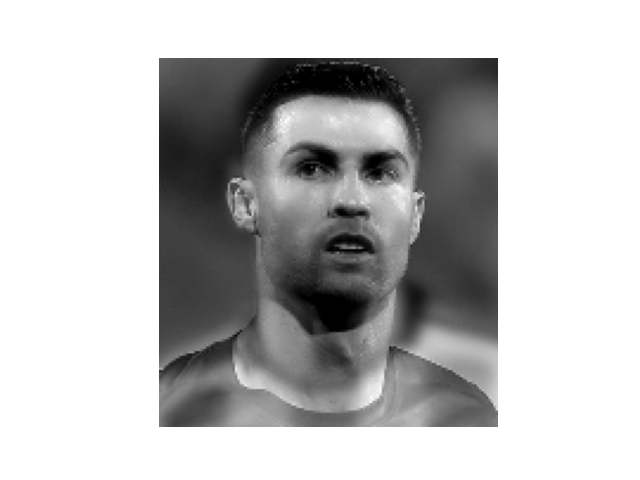

In [265]:
#crop
cropped_object = utils.interactive_crop(hybrid_im)

In [309]:
im1_file = datadir + 'einstein.jpg'
im2_file = datadir + 'musk.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


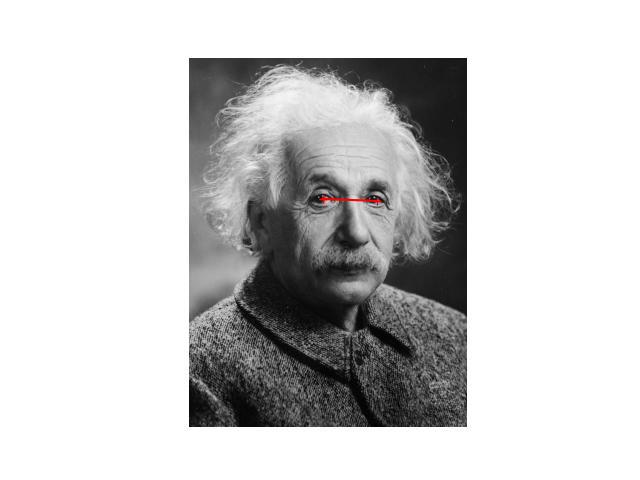

In [310]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


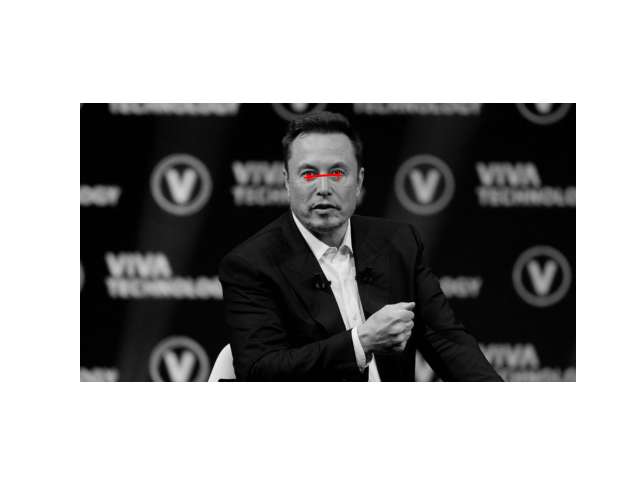

In [311]:
pts_im2 = utils.prompt_eye_selection(im2)

<IPython.core.display.Javascript object>


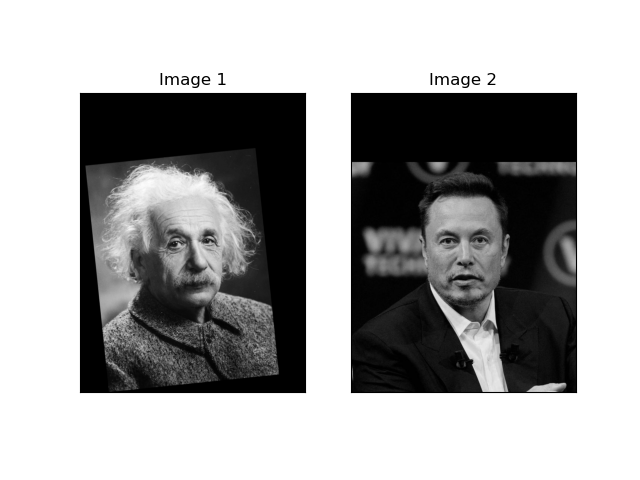

In [312]:
#alignment
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

#greyscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

#sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

<IPython.core.display.Javascript object>


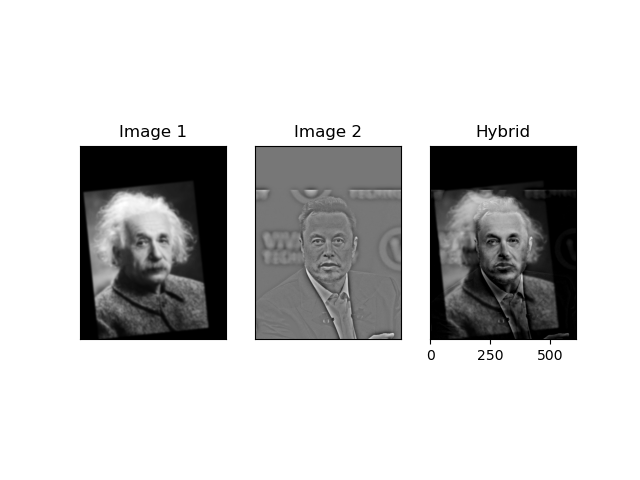

(Text(0.5, 1.0, 'Hybrid'), [], [])

In [324]:
#show results
sigma_low = 3
sigma_high = 10

low_pass_im, high_pass_im, hybrid_im = hybridImage(im1, im2, sigma_low, sigma_high)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(low_pass_im,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(high_pass_im,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(hybrid_im,cmap='gray')
axes[2].set_title('Hybrid'), axes[1].set_xticks([]), axes[2].set_yticks([])

<IPython.core.display.Javascript object>


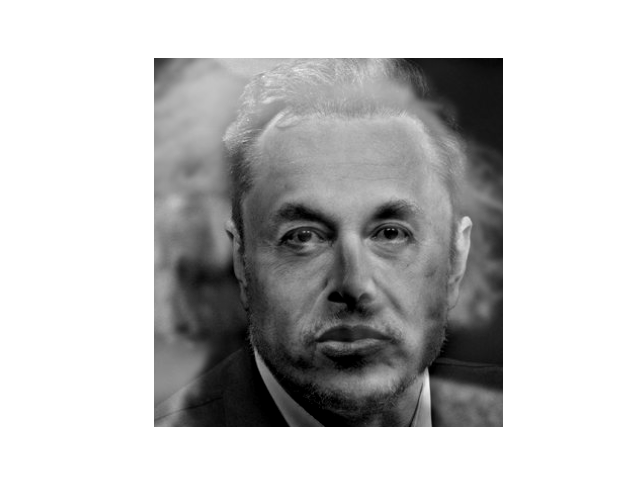

In [326]:
#crop
cropped_object = utils.interactive_crop(hybrid_im)

#### 5. color hybrid result

<IPython.core.display.Javascript object>


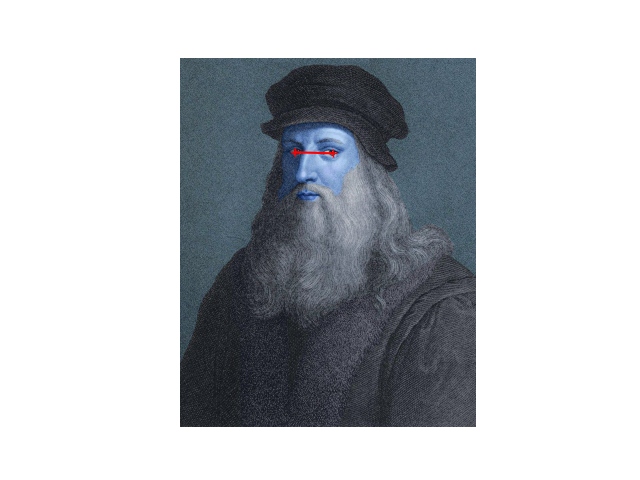

In [95]:
im1_file = datadir + 'da_vinci.jpg'
im2_file = datadir + 'mona_lisa.jpg'
im1 = cv2.imread(im1_file, cv2.IMREAD_COLOR) / 255.0
# im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0

# im2 = cv2.imread(im2_file, cv2.IMREAD_COLOR) / 255.0
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0

pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


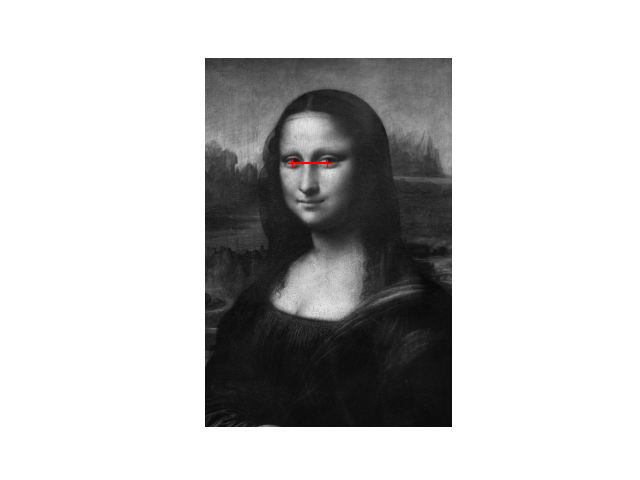

In [96]:
pts_im2 = utils.prompt_eye_selection(im2)

<IPython.core.display.Javascript object>


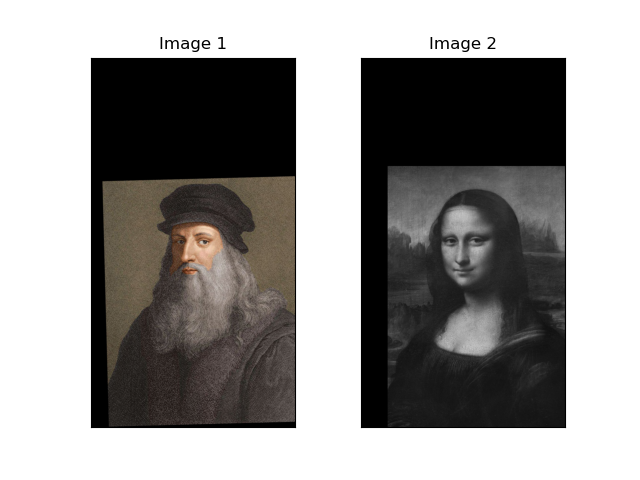

In [97]:
#alignment
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

#convert the images from BGR to RGB format
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) / 255.0

# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
# im1 = np.stack((im1,)*3, axis=-1) #convert grayscale to 3 channels

# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0
im2 = np.stack((im2,)*3, axis=-1) #convert grayscale to 3 channels

#sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1)
# axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
                  
# axes[1].imshow(im2)
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

<IPython.core.display.Javascript object>


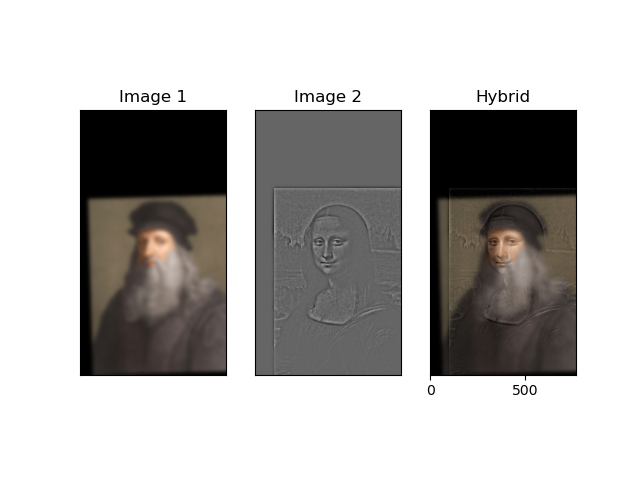

(Text(0.5, 1.0, 'Hybrid'), [], [])

In [101]:
sigma_low = 10 # choose parameters that work for your images
sigma_high = 8

low_pass_im, high_pass_im, hybrid_im = hybridImage(im1, im2, sigma_low, sigma_high)

#check if clipping input data to the valid range for imshow with RGB data ([0..1] for floats 
#or [0..255] for integers)
def normalization(im):
    if im.min() < 0 or im.max() > 1:
        im = im - im.min()  # Shift to 0
        im = im / im.max()  # Normalize to 1
    return im

#normalization
low_pass_im = normalization(low_pass_im)
high_pass_im = normalization(high_pass_im)
hybrid_im = normalization(hybrid_im)
    
# print(f"low_pass_im: {low_pass_im}")
# print(f"high_pass_im: {high_pass_im}")
# print(f"hybrid_im: {hybrid_im}")

fig, axes = plt.subplots(1, 3)
axes[0].imshow(low_pass_im)
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(high_pass_im)
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(hybrid_im)
axes[2].set_title('Hybrid'), axes[1].set_xticks([]), axes[2].set_yticks([])    

<IPython.core.display.Javascript object>


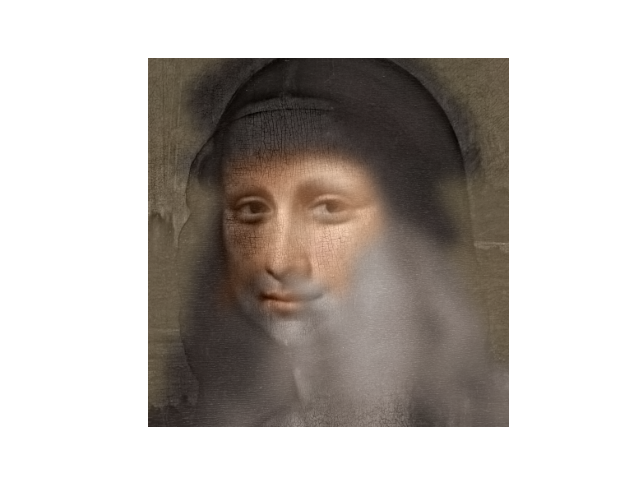

In [100]:
cropped_object = utils.interactive_crop(hybrid_im)

### Part II: Image Enhancement

#### Contrast enhancement

<IPython.core.display.Javascript object>


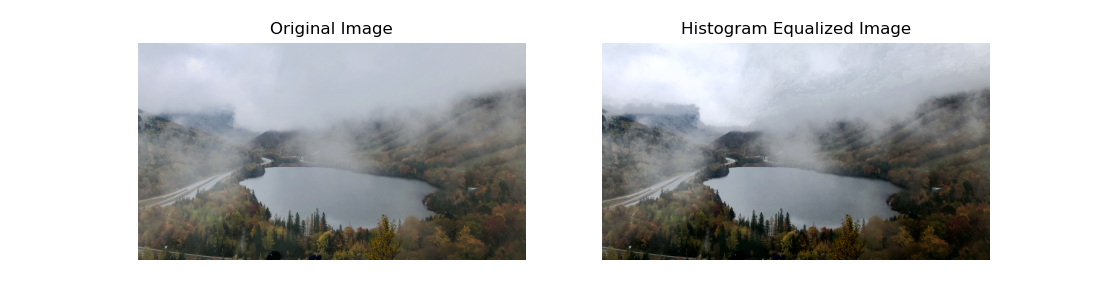

In [17]:
def load_im(im_path):
    return cv2.imread(im_path)

def contrast_enhancement(im):
    # Convert to YCrCb color space
    ycrcb_im = cv2.cvtColor(im, cv2.COLOR_BGR2YCrCb)

    # Apply histogram equalization to the luminance channel
    ycrcb_im[:, :, 0] = cv2.equalizeHist(ycrcb_im[:, :, 0])

    # Convert back to BGR color space
    equalized_im = cv2.cvtColor(ycrcb_im, cv2.COLOR_YCrCb2BGR)

    # Convert to RGB for display
    equalized_im_rgb = cv2.cvtColor(equalized_im, cv2.COLOR_BGR2RGB)
    
    return equalized_im, equalized_im_rgb
    
im = load_im(datadir + 'original_image.jpg')
original_im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
equalized_im, equalized_im_rgb = contrast_enhancement(im)[0], contrast_enhancement(im)[1]

plt.figure(figsize=(11, 3))
plt.subplot(1, 2, 1)
plt.imshow(original_im_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_im_rgb)
plt.title('Histogram Equalized Image')
plt.axis('off')

color_enhanced_path = datadir + 'histogram_equalized_image.jpg'
cv2.imwrite(color_enhanced_path, equalized_im)

plt.show()

#### Color enhancement 

<IPython.core.display.Javascript object>


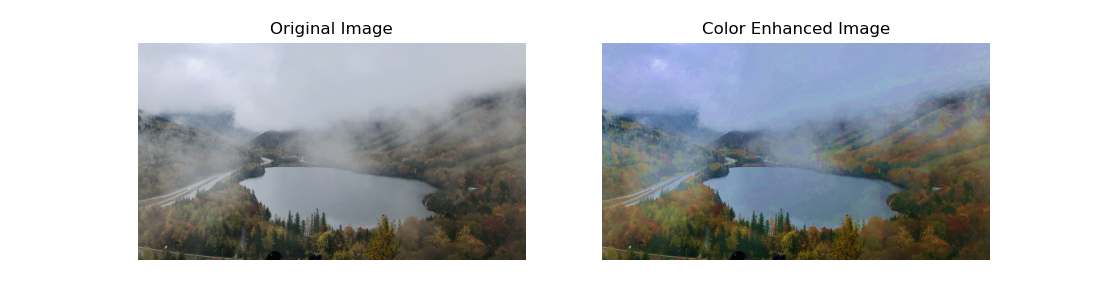

In [18]:
def color_enhancement(im):
    # Convert to hsv
    hsv_im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

    # Split into the Hue, Saturation, and Value channels
    h, s, v = cv2.split(hsv_im)
    
    # Raise to the power of 0.5 to increase saturation
    s_enhanced_non_linear = cv2.pow(s / 255.0, 0.5)  

    # Scale back to the range [0, 255]
    s_enhanced_non_linear = cv2.multiply(s_enhanced_non_linear, 255)

    # Clip and convert to uint8
    s_enhanced_non_linear = np.clip(s_enhanced_non_linear, 0, 255).astype(np.uint8)

    # Merge the channels back together
    hsv_enhanced_non_linear = cv2.merge([h, s_enhanced_non_linear, v])

    bgr_enhanced_non_linear = cv2.cvtColor(hsv_enhanced_non_linear, cv2.COLOR_HSV2BGR)
    rgb_enhanced_non_linear = cv2.cvtColor(bgr_enhanced_non_linear, cv2.COLOR_BGR2RGB)
    
    return bgr_enhanced_non_linear, rgb_enhanced_non_linear

bgr_enhanced_non_linear, rgb_enhanced_non_linear = color_enhancement(im)[0], color_enhancement(im)[1]

plt.figure(figsize=(11, 3))
plt.subplot(1, 2, 1)
plt.imshow(original_im_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_enhanced_non_linear)
plt.title('Color Enhanced Image')
plt.axis('off')

color_enhanced_path = datadir + 'color_enhanced_image.jpg'
cv2.imwrite(color_enhanced_path, bgr_enhanced_non_linear)


plt.show()

#### Color shift

<IPython.core.display.Javascript object>


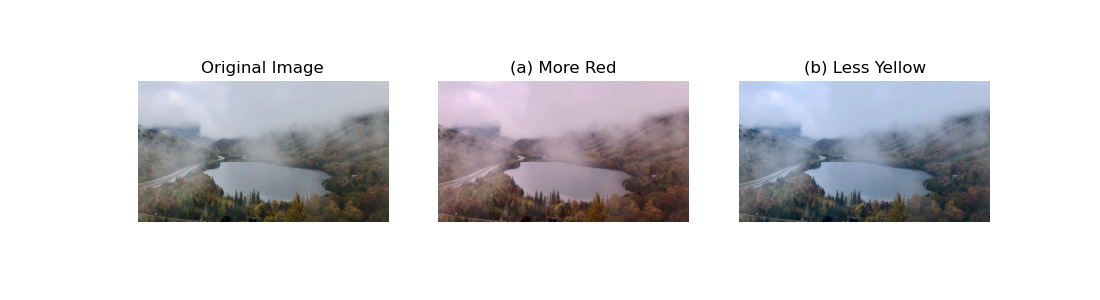

In [20]:
def color_shift(im):
    image_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

    # Split the LAB image into its channels
    L, A, B = cv2.split(image_lab)

    # Increase the A channel values to add more red
    A_more_red = A + 10
    A_more_red = np.clip(A_more_red, 0, 255)  # Ensure values are within [0, 255]

    # Decrease the B channel values to remove some yellow (yellow is opposite to blue in LAB)
    B_less_yellow = B - 10
    B_less_yellow = np.clip(B_less_yellow, 0, 255)  # Ensure values are within [0, 255]

    # Merge the modified A channel back with the original L and B channels
    im_lab_more_red = cv2.merge((L, A_more_red, B))
    im_lab_less_yellow = cv2.merge((L, A, B_less_yellow))

    # Convert the images back to BGR/RGB color space from LAB
    im_bgr_more_red = cv2.cvtColor(im_lab_more_red, cv2.COLOR_Lab2BGR)
    im_rgb_more_red = cv2.cvtColor(im_bgr_more_red, cv2.COLOR_BGR2RGB)
    
    im_bgr_less_yellow = cv2.cvtColor(im_lab_less_yellow, cv2.COLOR_Lab2BGR)
    im_rgb_less_yellow = cv2.cvtColor(im_bgr_less_yellow, cv2.COLOR_BGR2RGB)
    
    return im_bgr_more_red, im_rgb_more_red, im_bgr_less_yellow, im_rgb_less_yellow 


im_bgr_more_red, im_rgb_more_red, im_bgr_less_yellow, im_rgb_less_yellow = color_shift(im)[0], color_shift(im)[1],\
color_shift(im)[2], color_shift(im)[3]

plt.figure(figsize=(11, 3))

plt.subplot(1, 3, 1)
plt.imshow(original_im_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im_rgb_more_red)
plt.title('(a) More Red')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(im_rgb_less_yellow)
plt.title('(b) Less Yellow')
plt.axis('off')

more_red_path = datadir + 'more_red_image.jpg'
less_yellow_path = datadir + 'less_yellow_image.jpg'
cv2.imwrite(more_red_path, im_bgr_more_red)
cv2.imwrite(less_yellow_path, im_bgr_less_yellow)

plt.show()